<a href="https://colab.research.google.com/github/Abhishek-Patare/Abhishek-Patare/blob/main/Deep_Learning_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>What is Deep Learning ?</h2>

<h4>
A deep learning technique learn categories incrementally through it’s hidden layer architecture, defining low-level categories like letters first then little higher level categories like words and then higher level categories like sentences. In the example of image recognition it means identifying light/dark areas before categorizing lines and then shapes to allow face recognition. Each neuron or node in the network represents one aspect of the whole and together they provide a full representation of the image. Each node or hidden layer is given a weight that represents the strength of its relationship with the output and as the model develops the weights are adjusted</h4>
<br><br>

![](https://miro.medium.com/max/672/1*KYUUg9JC6InYe-VNPMDzAA.png)

<br><br><br>

<h3>Why Deep Learning over Machine learning ?</h3>

![](https://miro.medium.com/max/700/1*mVVglaFUwRz-HkcMlLyvgg.jpeg)

<br><br>
<h4>In traditional Machine learning techniques, most of the applied features need to be identified by an domain expert in order to reduce the complexity of the data and make patterns more visible to learning algorithms to work. The biggest advantage Deep Learning algorithms as discussed before are that they try to learn high-level features from data in an incremental manner. This eliminates the need of domain expertise and hard core feature extraction.</h4>

<br>

![](https://miro.medium.com/max/693/1*ZX05x1xYgaVoa4Vn2kKS9g.png)

<h1></b>Feed Forward Neural Network on IRIS dataset</b></h1>
<br>
 <h4>The goal of a feedforward network is to approximate some function f*. For example, for a classiﬁer, y = f*(x) maps an input x to a category y. A feedforward network deﬁnes a mapping y = f(x;θ) and learns the value of the parameters θ that result in the best function approximation.
These models are called feedforward because information ﬂows through the function being evaluated from x, through the intermediate computations used to deﬁne f, and ﬁnally to the output y. There are no feedback connections in which outputs of the model are fed back into itself.
</h4>

![Feed Forward Neural Network](https://www.neuraldesigner.com/images/iris-flowers-initial-neural-network.png)


<br><br>




<h2>Let's import required libraries and modules</h2>

*   Pandas : data analysis and manipulation tool
*   Scikit-learn : most useful and robust library for machine learning in Python
* Pytorch : An open source machine learning library (mostly used for deep learning models)

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
import torch.nn.functional as F

<h3> Check Device configuration <br> For a basic understanding GPU (Cuda) is faster than CPU in most of the cases</h3>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYWL9gqX6qgf1EXUmg855LPsDc3wrGfQ3b3Q&usqp=CAU)

In [3]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(data.shape)
print(labels.shape)

(150, 4)
(150,)


<h3><b>Splitting the dataset into train and test data respectively. We will train our model on training data and will test it on the test data/unseen data</b></h3>

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)



***Hyperparameters***
<br>

*   ***input_size*** :  Number of features that our dataset contains. In case of IRIS these are 4 (sepal_length, sepal_width, petal_length, petal_width)
*   ***hidden_size***: Number of neurons in the respective hidden layer.

*   ***learning rate*** :  controls how quickly the model is adapted to the problem






In [8]:
#hyperparameters
input_size = 4
hidden_size = 5
learning_rate = 0.1
num_epochs = 20
num_classes = 3

<h2><b>Defining a simple Feed Forward Neural Network<b></h2>

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 =  nn.Linear(hidden_size, num_classes)

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes).to(device)
model

NeuralNet(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=3, bias=True)
)

<h3>Cross Entropy Loss</h3>

![](https://miro.medium.com/max/1122/1*KY8QcvVOz1sdUnVKKhxWyA@2x.png)

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

<h3>Training our Neural Network<h3>
<br>
<h3>What is Backpropagation ?</h3>
<h4>Backpropagation is a short form for "backward propagation of errors." It is a standard method of training artificial neural networks. This method helps to calculate the gradient of a loss function with respects to all the weights in the network.</h4>
<br>
<h3>How backpropagation works?</h3>

![](https://www.guru99.com/images/1/030819_0937_BackPropaga1.png)

![lr](https://miro.medium.com/max/1400/1*GTRi-Y2doXbbrc4lGJYH-w.png)

In [11]:
for epoch in range(num_epochs):
    
    # Move tensors to the configured device
    X = torch.FloatTensor(X_train).to(device)
    Y = torch.LongTensor(Y_train).to(device)

    # Forward pass
    out = model(X)
    loss = criterion(out, Y)

    # Backprpagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
     
    acc = 100 * torch.sum(Y==torch.max(out.data, 1)[1]).double() / len(Y)
    print ('Epoch [{}/{}] , Loss: {:.4f} , Accuracy: {:.4f}' 
                   .format(epoch+1, num_epochs , loss.item(), acc.item() ))
    

Epoch [1/20] , Loss: 1.4820 , Accuracy: 34.0000
Epoch [2/20] , Loss: 1.2354 , Accuracy: 31.0000
Epoch [3/20] , Loss: 1.1456 , Accuracy: 34.0000
Epoch [4/20] , Loss: 0.9547 , Accuracy: 40.0000
Epoch [5/20] , Loss: 0.9666 , Accuracy: 35.0000
Epoch [6/20] , Loss: 0.7554 , Accuracy: 69.0000
Epoch [7/20] , Loss: 0.6188 , Accuracy: 67.0000
Epoch [8/20] , Loss: 0.5696 , Accuracy: 65.0000
Epoch [9/20] , Loss: 0.5227 , Accuracy: 65.0000
Epoch [10/20] , Loss: 0.4717 , Accuracy: 65.0000
Epoch [11/20] , Loss: 0.4381 , Accuracy: 74.0000
Epoch [12/20] , Loss: 0.3983 , Accuracy: 85.0000
Epoch [13/20] , Loss: 0.3718 , Accuracy: 86.0000
Epoch [14/20] , Loss: 0.3486 , Accuracy: 87.0000
Epoch [15/20] , Loss: 0.3181 , Accuracy: 93.0000
Epoch [16/20] , Loss: 0.2843 , Accuracy: 97.0000
Epoch [17/20] , Loss: 0.2437 , Accuracy: 96.0000
Epoch [18/20] , Loss: 0.2021 , Accuracy: 97.0000
Epoch [19/20] , Loss: 0.1645 , Accuracy: 97.0000
Epoch [20/20] , Loss: 0.1342 , Accuracy: 97.0000


<h3>Evaluating our model on test data</h3>

In [12]:
X_test = torch.FloatTensor(X_test).to(device)
Y_test = torch.LongTensor(Y_test).to(device)
out = model(X_test)
predicted = torch.max(out.data, 1)[1]
print('Accuracy of the network %.4f %%' % (100 * torch.sum(Y_test==predicted).double() / len(Y_test)))

Accuracy of the network 92.0000 %


<h2>Convolutional Neural Network (CNN) on CIFAR-10 Dataset</h2>
<br>
<h3>Let's understand convolutions</h3>
<h4>2D convolution(Image has only 1 channel) : It is a fairly simple operation . You start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. The output features are essentially, the weighted sums (with the weights being the values of the kernel itself) of the input features located roughly in the same location of the output pixel on the input layer.</h4>

![](https://media2.giphy.com/media/i4NjAwytgIRDW/200.webp?cid=ecf05e47mwezr9hak4lnlm9cenw09d5971wf4gmu5xam7ahz&rid=200.webp)

<br> 
<h4> As we know most of the images have 3 channels(RGB), So how to perform convolution in that case ?<br><br>


*   In such a case , we will take number of kernels equal to that of number of channels in the input image and stack them together to make a 3D filter.
*   Now instead of a 2D kernel (as in the case of 2D convolution) , our 3D filter (which is multiple kernels stacked) will slide over the 3D input data.

*   So using one such filter, we will get 1 channel in the output.
*   If we want multiple channels in the output, we have to use multiple 3D filters and concat their outputs, resulting in a 3D output with the number of output channels being the number of filters.






In [15]:
import torchvision
import torchvision.transforms as transforms

<h4>Batch Size : The batch size is a hyperparameter used in machine learning and refers to the number of training examples utilized in one iteration.
<br><br>Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.</h4>


In [16]:
n_epochs = 2
batch_size_train = 4
batch_size_test = 4
learning_rate = 0.001

<h4>CIFAR 10 dataset : 60,000 RGB images (32*32*3 and 6000 each of 10 classes) , out of which  50,000 are for training purpose and 10,000 are for testing purpose.

![](https://pytorch.org/tutorials/_images/cifar10.png)

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


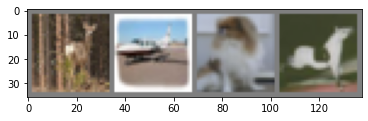

 deer plane   dog horse


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

<h4>Defining our model

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #(32*32*3) conv (5*5*3)[6 filters] = (28*28*6)
        self.conv1 = nn.Conv2d(3, 6, 5) #(in_channels, out_channels, kernel_size )
        self.pool = nn.MaxPool2d(2, 2) #(kernel_size, stride)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


<h3>Training the model</h3>

In [21]:
for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.864
[1,  6000] loss: 1.669
[1,  8000] loss: 1.568
[1, 10000] loss: 1.528
[1, 12000] loss: 1.488
[2,  2000] loss: 1.423
[2,  4000] loss: 1.386
[2,  6000] loss: 1.373
[2,  8000] loss: 1.335
[2, 10000] loss: 1.293
[2, 12000] loss: 1.298
Finished Training


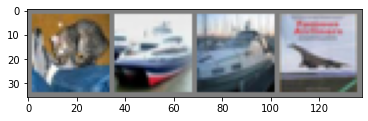

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship


In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images.to(device))
predicted = torch.max(outputs, 1)[1]
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

<h4>Evaluating on test data</h4>

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


<h4>Individual class accuracy</h4>

In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 67 %
Accuracy of  bird : 48 %
Accuracy of   cat : 39 %
Accuracy of  deer : 36 %
Accuracy of   dog : 58 %
Accuracy of  frog : 42 %
Accuracy of horse : 51 %
Accuracy of  ship : 77 %
Accuracy of truck : 46 %
